# COMP 136 day06 Lab: Dirichlet distributions and the Dirichlet-Categorical model for discrete outcomes

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

np.set_printoptions(precision=3, suppress=False)

pd.options.display.float_format = '{:,.3g}'.format  # show 4 digits of precision

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

prng = np.random.RandomState(0) ##Set our random state so things are reproducible.

## Dirichlet Distribution: Standard Numerical implementations

You can use the built-in functions from SciPy to sample from this distribution:

* To draw samples:
* * [`scipy.stats.dirichlet(hyperparameters).rvs(size=(nrows,ncols), random_state=SEED)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dirichlet.html)
* * OR [`np.random.dirichlet(hyperparameters)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html)

* To evaluate the PDF:
* * Evaluate pdf with `scipy.stats.<distribution>(hyperparameters).pdf(values)` (can use the `logpdf` instead of `pdf`)

See <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dirichlet.html>


# Setup Visualization: Plotting V=3 samples on the 'triangle'

This code below just defines a function to help us visualize a provided array of samples of vector mu. 
* Visualizing V-ary dirichlets (with 3 categories) can be done with a triangle view (since the actual space of allowed parameters has 2 effective dimensions on one plane)

Don't worry too much about understanding the details, so feel free to skip ahead.

In [2]:
def show_samples_on_V3_triangle(mu_S3=None, ax_handle=None, transparency=1.0):
    ''' Show samples from a Dirichlet on the triangle view of the V=3 simplex
    
    Create a triangle where each corner represents one extreme one-hot mu value
    Then plot each sampled mu vector (in V=3 dim space) as a point on this triangle
    
    Args
    ----
    mu_S3 : None or 2D array, shape (n_samples, n_categories) = (S, V)
        Provide many samples of 3-dimensional probability vectors
        Each row of this array should sum to one.
        Each sample vector will be visualized as a point on the triangle.
        If None, just plot the triangle with no samples.
    ax_handle : None or matplotlib axis handle
        If an axis handle is provided, will draw triangle in this handle
        If None, will create a new figure
    transparency : float, between 0.0 and 1.0
        Specifies the transparency of the samples.
        When number of samples is small, defaults to 1.0 so each sample easy to see.
        When number of samples is large, useful to set small (like 0.05) so density is visible.
    
    References
    ----------
    Many thanks to code here that inspired this
    http://y-okamoto-psy1949.la.coocan.jp/Python/en1/Dirichlet/
    '''
    # Create new figure if needed
    if ax_handle is None:
        plt.figure(figsize = (5, 5))
        ax_handle = plt.gca()
    else:
        plt.sca(ax_handle)

    # Create 3 vertices of an equilateral triangle
    P1_12 = np.asarray([0.0, (3.0**0.5) - 1.0]).reshape((1,2))
    P2_12 = np.array([-1.0, -1.0]).reshape((1,2))
    P3_12 = np.array([1.0, -1.0]).reshape((1,2))
    corners_32 = np.vstack([P1_12, P2_12, P3_12])
    
    # Draw the triangle
    # be sure to complete outline by going back to first point
    corners_42 = np.vstack([corners_32, P1_12])
    ax_handle.plot(corners_42[:,0], corners_42[:,1])
    
    # Label each vertex of the triangle
    B = 0.2
    ax_handle.text(P1_12[0,0] + B/2, P1_12[0,1] - B/3,
                   '$\mu = [1, 0, 0]$', fontsize = 12)
    ax_handle.text(P2_12[0,0], P2_12[0,1] - B/2,
                   '$\mu = [0, 1, 0]$', fontsize = 12)
    ax_handle.text(P3_12[0,0] - 3*B, P3_12[0,1] - B/2,
                   '$\mu = [0, 0, 1]$', fontsize = 12)

    # Make plot pretty
    ax_handle.set_yticks([]);
    ax_handle.set_xticks([]);
    sns.despine(top=True, right=True, left=True, bottom=True);
    ax_handle.set_aspect('equal');

    # Show provided sample points as points within the triangle
    if mu_S3 is not None:
        assert mu_S3.ndim == 2
        S, V = mu_S3.shape
        assert V == 3

        points_S2 = np.dot(mu_S3, corners_32)
        ax_handle.plot(points_S2[:,0], points_S2[:,1],
                       '.', color='b', linewidth=0, alpha=transparency)

# Show an interior value of mu

The triangle's corners represent the 3 "extreme" possible values of $\mu$

We show a particular $\mu$ vector on the triangle plot, marked by the blue dot

Plotting mu_1V
-------------
[[0.05 0.15 0.8 ]]


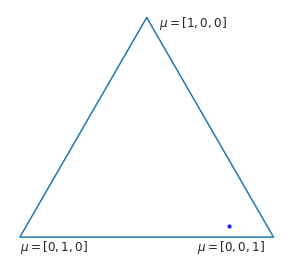

In [3]:
mu_1V = np.asarray([[0.05, 0.15, 0.8]])

print("Plotting mu_1V")
print("-------------")
print(mu_1V)

show_samples_on_V3_triangle(mu_1V)

# 1a: Does the location of the plotted mu as a dot within the triangle make sense?

TODO discuss

## 1b: Generate and visualize samples from a dirichlet with alpha =  [7, 2, 1]

Let's generate many samples from a specific Dirichlet distribution, and practice visualizing it

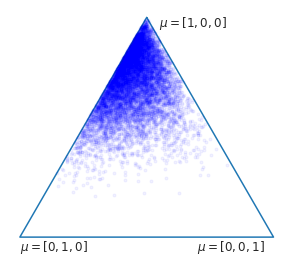

In [4]:
V = 3
alpha_V = np.asarray([7, 2, 1])

# First, make a 2D array that is (n_samples, n_categories) = (S, V)
S = 10000
mu_SV = np.zeros((S, V))

# Fill in this array with samples from a dirichlet over V categories
for s in range(S):
    mu_SV[s] = prng.dirichlet(alpha_V)
    
# Convert to a pandas data frame (easy to use with seaborn visualization library)
mu_df = pd.DataFrame(mu_SV, columns=['$\mu_1$', '$\mu_2$', '$\mu_3$'])

# Show triangle plot of samples
show_samples_on_V3_triangle(mu_df.values, transparency=0.05)

## 1c: Generate and visualize samples from a dirichlet with alpha = [0.9, 0.5, 0.1]

In [5]:
# TODO write code based on the code above to sample and visualize the specified dirichlet distribution

## 1d: Specify an alpha that encodes the following prior knowledge

We want to encode a prior that says we expect dimension 2 to be much more likely than dimensions 0 or 1.

TODO: Write down an alpha = [alpha_0, alpha_1, alpha_2] that encodes this information

## 1e: Generate and visualize samples from a dirichlet with the alpha you specified.  Does it have the property you designed it to have?

I.e. do the samples concentrate towards the part of the triangle where mu = [0, 0, 1]?

In [6]:
# TODO write code based on the code above to sample and visualize your dirichlet distribution